In [223]:
# importando a biblioteca pandas

import pandas as pd

# importando as planilhas

cadastro_df = pd.read_csv("dataset/cadastro - cadastro.csv")
salario_profissoes_df = pd.read_csv("dataset/salario_profissoes - salario_profissoes.csv")
preco_gasolina_df = pd.read_csv("dataset/preco da gasolina - preco da gasolina.csv")

In [224]:
cadastro_df.head(4)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior


In [227]:
salario_profissoes_df.head(4)

,Profissões,salario até 3 anos,salaior +3 anos
0,Cientista de Dados,10000,14000
1,dona de casa,1200,1200
2,desempregado,0,0
3,Gerente de Projeto,5000,10000


In [103]:
preco_gasolina_df.head(4)

,cidade,preço
0,São Vicente,"3,45"
1,Santos,"3,33"
2,São Paulo,"3,23"
3,Monte Alto,4


In [440]:
# Exercício 1: Qual a idade média das pessoas no cadastro ?

from datetime import datetime

now = datetime.now() 
ano_atual = now.year # essa variável sempre trará o ano atual do sistema
qtde = len(cadastro_df.ano_nascimento) 
cadastro_df['idade'] = ano_atual - cadastro_df.ano_nascimento
total_idades = sum(cadastro_df.idade)

media_idades = print("A idade média das pessoas do cadastro é", round((total_idades / qtde),2), "anos")

A idade média das pessoas do cadastro é 32.73 anos


In [441]:
# Exercício 2 e 3: Quantos homens tem no cadastro ? Quantas mulheres tem no cadastro ?

qtd_homens = cadastro_df.loc[cadastro_df.sexo == 'm'].sexo.value_counts()
qtd_mulheres = cadastro_df.loc[cadastro_df.sexo == 'f'].sexo.value_counts()

print("No cadastro existem", "%.0f"%qtd_homens,"homens e","%.0f"%qtd_mulheres, "mulheres")


No cadastro existem 16 homens e 14 mulheres


In [168]:
# Exercício 4: Qual a idade média dos homens e das mulheres ?

idade_media_homens = cadastro_df.loc[cadastro_df.sexo == 'm'].idade.sum() / qtd_homens
idade_media_mulheres = cadastro_df.loc[cadastro_df.sexo == 'f'].idade.sum() / qtd_mulheres

print("A idade média dos homens é de", "%.0f"%idade_media_homens,"anos e das mulheres é","%.0f"%idade_media_mulheres, "anos")


A idade média dos homens é de 32 anos e das mulheres é 34 anos


In [173]:
escolaridade = cadastro_df.loc[cadastro_df.escolaridade != ''].escolaridade.value_counts()

In [398]:
escolaridade

Ensino Superior    12
ensino superior     9
Ensino Médio        4
ensino médio        3
ensino Médio        1
Ensimo Tecnico      1
Name: escolaridade, dtype: int64

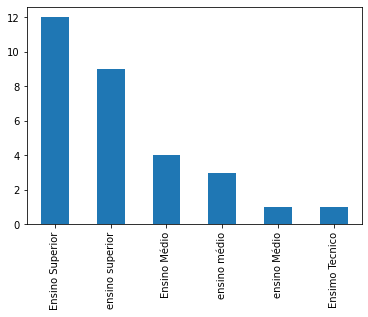

In [442]:
# Exercício 5: Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro

escolaridade.plot(kind='bar')

In [235]:
# não consegui renomear nas tabelas principais, então criei essas duas para continuar o exercício
salario_renomeado_df = salario_profissoes_df.rename(columns={'Profissões':'profissoes', 'salario até 3 anos':'salarioate3anos','salaior +3 anos':'salariomaior3anos'})
cadastro_renomeado_df = cadastro_df.rename(columns={'profissão':'profissoes', 'experiencia profissional': 'experiencia_profissional','tem carro':'tem_carro'})

In [237]:
cadastro_renomeado_df.head(4)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissoes,experiencia_profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem_carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior


In [238]:
salarios_cadastro_df = cadastro_renomeado_df.merge(salario_renomeado_df, left_on='profissoes',right_on='profissoes')

In [239]:
salarios_cadastro_df.head(5)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissoes,experiencia_profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem_carro,escolaridade,salarioate3anos,salariomaior3anos
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,10000,14000
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,1200,1200
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,0,0
3,Lucas,Silva e Silva,1995,m,Goias,desempregado,1,Solteiro,0,estudo,sim,correr na rua,4.0,não,Ensino Superior,0,0
4,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior,5000,10000


In [250]:
media_sal_menor3anos = salarios_cadastro_df.loc[salarios_cadastro_df.experiencia_profissional <= 3].salarioate3anos.sum()
media_sal_maior3anos = salarios_cadastro_df.loc[salarios_cadastro_df.experiencia_profissional > 3].salariomaior3anos.sum()

In [297]:
# Exercício 6: Mostre a Média Salarial do cadastro 

print("A média salarial geral é de","%.2f"%((media_sal_menor3anos + media_sal_maior3anos)/qtde), "rea")

A média salarial geral é de 4463.333333333333 reais


In [264]:
maiorsalario = salarios_cadastro_df.loc[salarios_cadastro_df.experiencia_profissional > 3].salariomaior3anos.max()

In [281]:
maiorsalario_df = salarios_cadastro_df.sort_values(by=['salariomaior3anos'], ascending=False)

In [443]:
# Exercício 7: Quem tem o maior salário 

print("Quem tem o maior salário é", "%.11s"%maiorsalario_df.nome.head(1),", o salário é","%.2f"%maiorsalario_df.salariomaior3anos.head(1))

Quem tem o maior salário é 9    Mirtes , o salário é 20000.00


In [343]:
menorsalario_df = salarios_cadastro_df.loc[salarios_cadastro_df.profissoes != 'desempregado'].sort_values(by=['salarioate3anos'], ascending=True)

In [444]:
# Exercício 8: Tirando desempregado quem recebe menos 

print("Quem tem o menor salário é", "%.13s"%menorsalario_df.nome.head(1),", o salário é","%.2f"%menorsalario_df.salariomaior3anos.head(1), "ele é","%.15s"%menorsalario_df.profissoes.head(1))

Quem tem o menor salário é 11    Gabriel , o salário é 0.00 ele é 11    estudante


In [445]:
# Exercício 9: Quantas pessoas gostam de caminhar no final de semana 

caminhar_fds = salarios_cadastro_df.loc[salarios_cadastro_df.lazer_final_de_semana.str.contains("caminhar")].lazer_final_de_semana.value_counts()
caminhar_fds

caminhar, ler livros e ficar com o filho    1
caminhar, ficar com os filhos               1
caminhar                                    1
Name: lazer_final_de_semana, dtype: int64

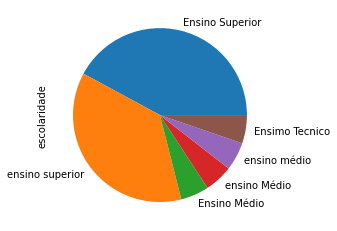

In [451]:
# Exercicio 10: Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte  

escolaridade_esporte = cadastro_df.loc[(cadastro_df.escolaridade != '') & (cadastro_df.pratica_esporte == 'sim')].escolaridade.value_counts()
sizes = escolaridade_esporte
escolaridade_esporte.plot(kind='pie')

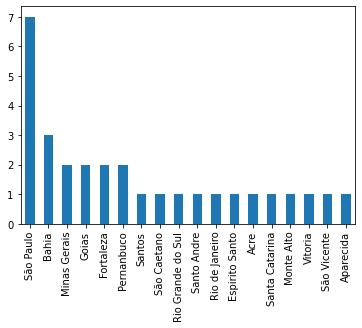

In [454]:
# Exercício 12: Mostre de forma gráfica a distribuição de estados do cadastro (cidades, não tem estado no cadastro)

cidades = cadastro_df.loc[cadastro_df.cidade != ''].cidade.value_counts()
cidades.plot(kind='bar')

In [ ]:
# Thiago, não consegui fazer a 11 e não consegui formatar bonitinho com html, mas fiz o que deu :D